<a href="https://colab.research.google.com/github/espanolamarie/BSIS-2A-/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/espanolamarie/BSIS-2A-/refs/heads/main/student_grades_dataset.csv')

In [3]:
df.head()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
0,1,8.116262,51.571459,82.101582,43.576277
1,2,19.063572,81.820521,54.206998,45.175683
2,3,14.907885,65.717799,58.081436,53.822645
3,4,12.374511,75.428535,94.927709,59.226273
4,5,3.964354,95.378324,80.321453,44.169962


In [4]:
df.describe()


,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,9.933434,74.891586,75.880067,49.554008
std,29.011492,5.652299,14.655563,14.671312,8.306661
min,1.000000,1.104920,50.347607,50.253079,29.071858
25%,25.750000,4.670814,62.100226,63.843993,43.787599
50%,50.500000,9.818707,75.281243,78.127747,49.778791
75%,75.250000,14.873859,88.309180,87.618347,56.605490
max,100.000000,19.750852,99.282523,99.502693,67.636659


In [5]:
df.mean()

,0
Student_ID,50.500000
Study_Hours,9.933434
Attendance_Percentage,74.891586
Quiz_Average,75.880067
Final_Grade,49.554008


In [6]:
df.median()

,0
Student_ID,50.500000
Study_Hours,9.818707
Attendance_Percentage,75.281243
Quiz_Average,78.127747
Final_Grade,49.778791


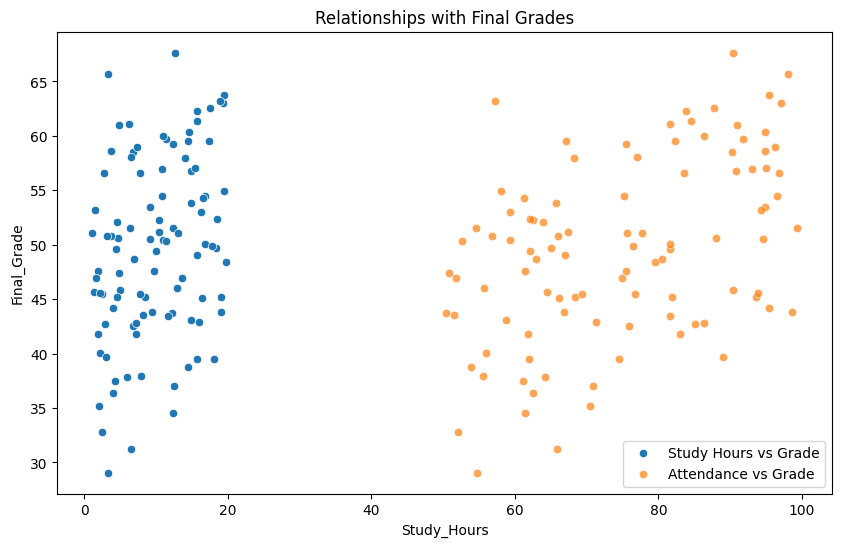

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours', y='Final_Grade', data=df, label="Study Hours vs Grade")
sns.scatterplot(x='Attendance_Percentage', y='Final_Grade', data=df, label="Attendance vs Grade", alpha=0.7)
plt.legend()
plt.title("Relationships with Final Grades")
plt.show()

In [8]:
df.dropna()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
0,1,8.116262,51.571459,82.101582,43.576277
1,2,19.063572,81.820521,54.206998,45.175683
2,3,14.907885,65.717799,58.081436,53.822645
3,4,12.374511,75.428535,94.927709,59.226273
4,5,3.964354,95.378324,80.321453,44.169962
...,...,...,...,...,...
95,96,10.382116,67.460479,76.112163,51.182953
96,97,10.931924,86.297784,88.499678,59.932607
97,98,9.123279,94.855513,60.791051,53.485009
98,99,1.482963,94.354321,81.144524,53.181605


In [9]:
X = df[['Study_Hours', 'Attendance_Percentage', 'Quiz_Average']]
y = df['Final_Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)



In [15]:
def predict_grade(study_hours, attendance, quiz_average):
    input_data = np.array([[study_hours, attendance, quiz_average]])
    predicted_grade = model.predict(input_data)
    return predicted_grade[0]

In [16]:
hypothetical_study_hours = 10
hypothetical_attendance = 80
hypothetical_quiz_average = 75
predicted_grade = predict_grade(hypothetical_study_hours, hypothetical_attendance, hypothetical_quiz_average)
print(f"Predicted Final Grade: {predicted_grade}")

Predicted Final Grade: 51.970178694683256


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


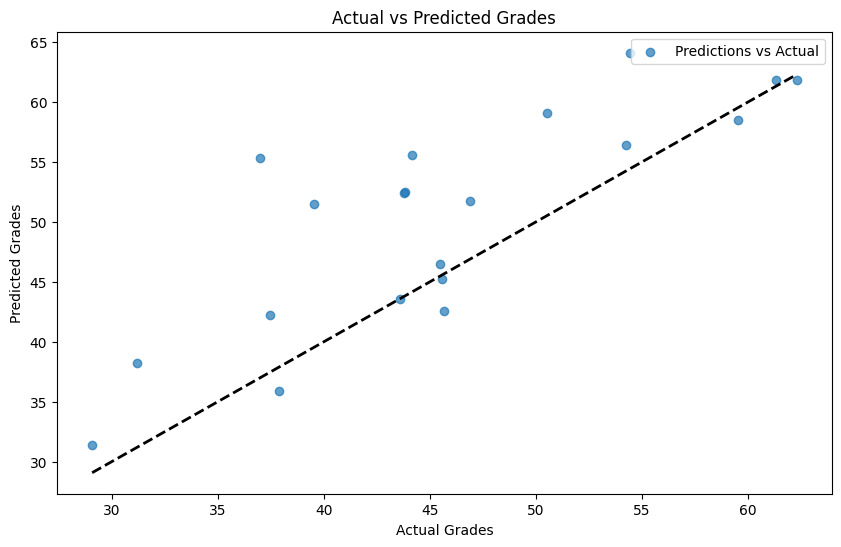

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.legend()
plt.show()